# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [2]:
#create path
path = r'C:\Users\smerg\Instacart Grocery Basket Analysis'

In [3]:
# Importing data
instacart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_filtered.csv'))


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\167233320.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  instacart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_filtered.csv'))


### Makinging visualiations

In [4]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Display the unique regions to confirm the filtering
print("Unique Regions after filtering:")
print(filtered['Region'].unique())


Unique Regions after filtering:
['Midwest' 'Northeast' 'West' 'South']


In [5]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Define a function to categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Apply the function to create a new column for age group
filtered['Age_Group'] = filtered['age'].apply(categorize_age)


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\2583181551.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Age_Group'] = filtered['age'].apply(categorize_age)


In [6]:
# Group by Region and Age_Group, and count the number of customers
age_region_group = filtered.groupby(['Region', 'Age_Group']).size().unstack().fillna(0)

print(age_region_group)  # Optional: to check the grouping result


Age_Group  Middle-Aged Adult   Senior  Young Adult
Region                                            
Midwest              2742031  2319549      1798513
Northeast            1994690  1793698      1389849
South                3590364  3136472      2470832
West                 2954479  2555549      1976349


<Figure size 1200x800 with 0 Axes>

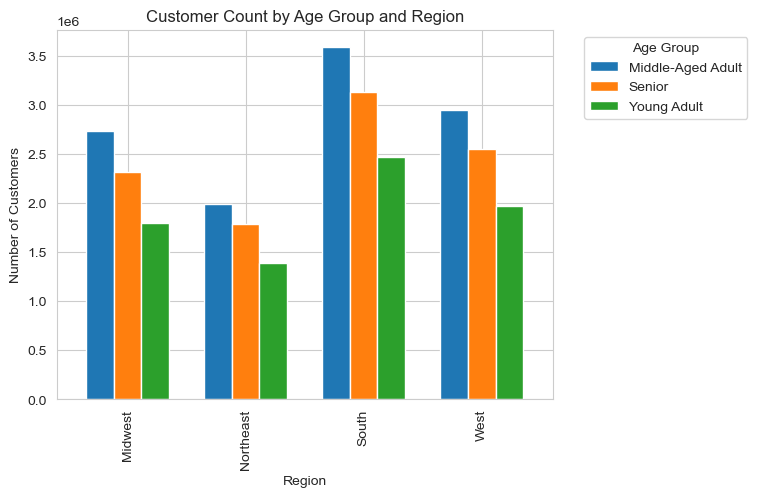

In [7]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
age_region_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Region')

# Adjust the legend
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [8]:

# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Define a function to categorize customers by dependent size
def categorize_dependents(num_dependents):
    if num_dependents == 0:
        return 'No Dependents'
    elif 1 <= num_dependents <= 2:
        return 'Small'
    elif num_dependents == 3:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column for dependent size
filtered['Dependent_Size'] = filtered['number_of_dependants'].apply(categorize_dependents)


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\1420225750.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Dependent_Size'] = filtered['number_of_dependants'].apply(categorize_dependents)


In [9]:
# Group by Region and Dependent_Size, and count the number of customers
dependents_region_group = filtered.groupby(['Region', 'Dependent_Size']).size().unstack().fillna(0)

print(dependents_region_group)  # Optional: to check the grouping result


Dependent_Size   Medium  No Dependents    Small
Region                                         
Midwest         1680645        1726864  3452584
Northeast       1302989        1280026  2595222
South           2300076        2298270  4599322
West            1911970        1872734  3701673


<Figure size 1200x800 with 0 Axes>

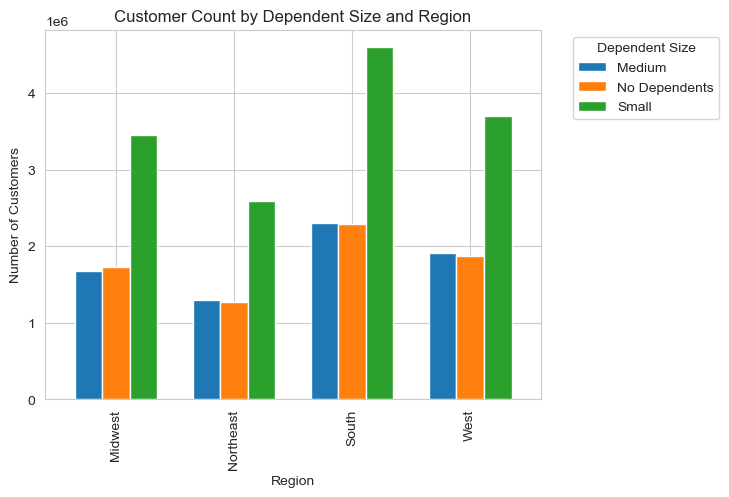

In [10]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
dependents_region_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Dependent Size and Region')

# Adjust the legend
plt.legend(title='Dependent Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [11]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Define a function to categorize customers by income level
def categorize_income(income):
    if income < 40000:
        return 'Low Income'
    elif 40000 <= income < 100000:
        return 'Median Income'
    else:
        return 'High Income'

# Apply the function to create a new column for income level
filtered['Income_Level'] = filtered['income'].apply(categorize_income)


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\4141633821.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Income_Level'] = filtered['income'].apply(categorize_income)


In [12]:
# Group by Region and Income_Level, and count the number of customers
income_region_group = filtered.groupby(['Region', 'Income_Level']).size().unstack().fillna(0)

print(income_region_group)  # Optional: to check the grouping result


Income_Level  High Income  Low Income  Median Income
Region                                              
Midwest           3222936      356911        3280246
Northeast         2391754      266411        2520072
South             4140830      488519        4568319
West              3418017      379126        3689234


<Figure size 1200x800 with 0 Axes>

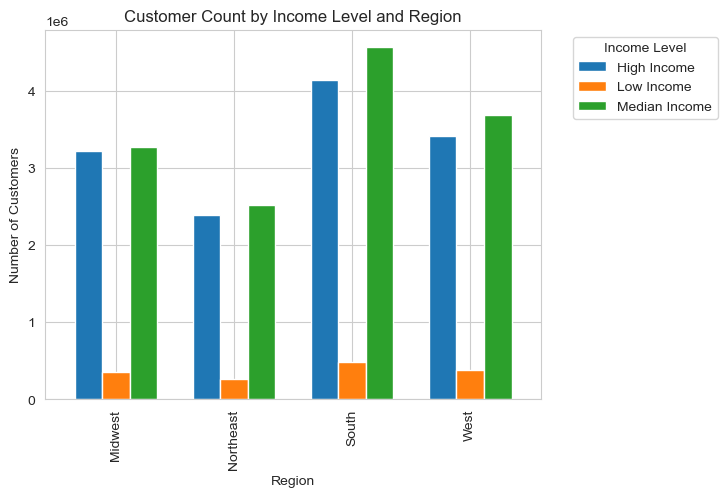

In [13]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
income_region_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Income Level and Region')

# Adjust the legend
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [14]:
# Define a function to categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Apply the function to create a new column for age group
instacart['Age_Group'] = instacart['age'].apply(categorize_age)


In [15]:
# Group by Age_Group and order_frequency_flag, and count the number of customers
age_frequency_group = instacart.groupby(['Age_Group', 'order_frequency_flag']).size().unstack().fillna(0)

print(age_frequency_group)  # Optional: to check the grouping result


order_frequency_flag  Frequent customer  Non-frequent customer  \
Age_Group                                                        
Middle-Aged Adult               7865387                1082646   
Senior                          6856696                 933440   
Young Adult                     5305405                 726290   

order_frequency_flag  Regular customer  
Age_Group                               
Middle-Aged Adult              2547835  
Senior                         2209132  
Young Adult                    1745159  


<Figure size 1200x800 with 0 Axes>

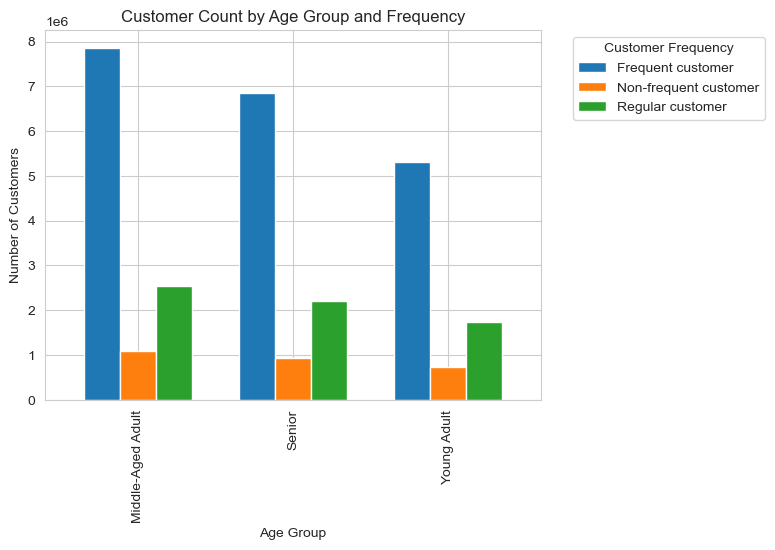

In [16]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
age_frequency_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Frequency')

# Adjust the legend
plt.legend(title='Customer Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [17]:
# Group by family_status (marital status) and count the number of orders
marital_order_counts = instacart.groupby('family_status')['order_id'].count()

print(marital_order_counts)  # Optional: to check the grouping result


family_status
divorced/widowed                     2510717
living with parents and siblings     1405175
married                             20553982
single                               4802116
Name: order_id, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\3476858729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_order_counts.index, y=marital_order_counts.values, palette="muted")


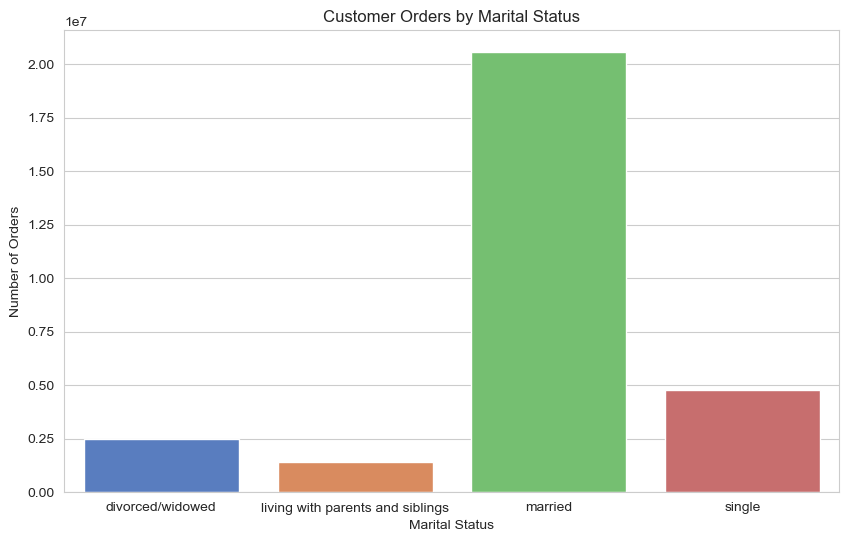

In [18]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_order_counts.index, y=marital_order_counts.values, palette="muted")

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.title('Customer Orders by Marital Status')

# Show the plot
plt.show()


In [19]:
# Group by age and calculate the average number of dependents
age_dependents = instacart.groupby('age')['number_of_dependants'].mean()

print(age_dependents)  # Optional: to check the grouping result


age
18    1.509356
19    1.566801
20    1.471394
21    1.492492
22    1.467965
        ...   
77    1.514395
78    1.430705
79    1.529888
80    1.523484
81    1.458153
Name: number_of_dependants, Length: 64, dtype: float64


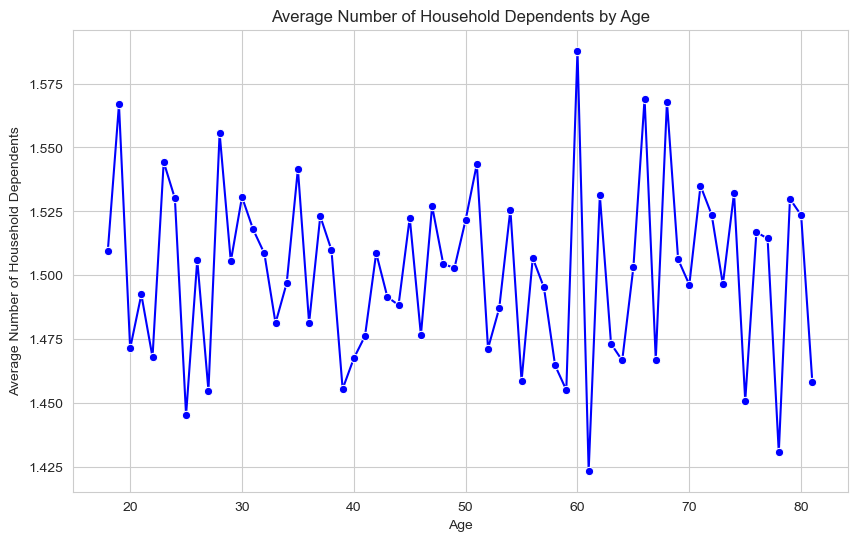

In [20]:
# Set the visual style
sns.set_style("whitegrid")

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_dependents.index, y=age_dependents.values, marker='o', color='b')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Number of Household Dependents')
plt.title('Average Number of Household Dependents by Age')

# Show the plot
plt.show()


In [21]:
# Define a function to categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Apply the function to create a new column for age group
instacart['Age_Group'] = instacart['age'].apply(categorize_age)

# Calculate the percentage of each age group
age_group_percentage = instacart['Age_Group'].value_counts(normalize=True) * 100

print(age_group_percentage)  # Optional: to check the percentage result


Age_Group
Middle-Aged Adult    39.272588
Senior               34.159850
Young Adult          26.567562
Name: proportion, dtype: float64


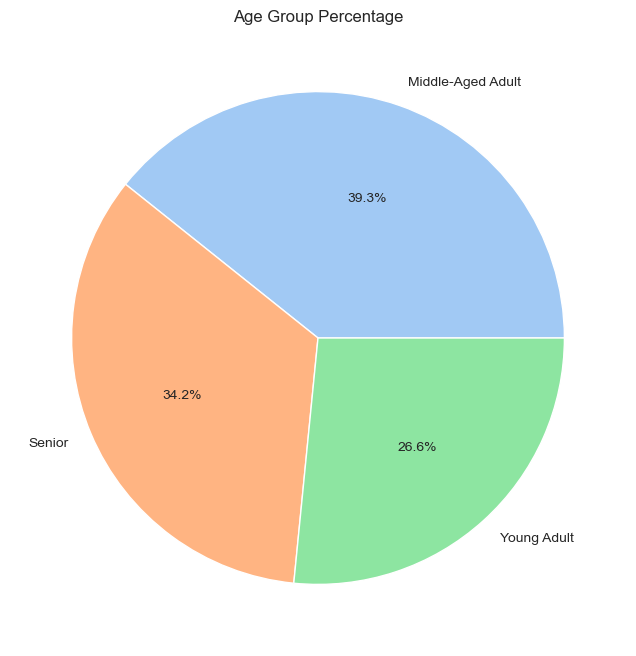

In [22]:
# Set the visual style
sns.set_style("whitegrid")

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentage, labels=age_group_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Add title
plt.title('Age Group Percentage')

# Show the plot
plt.show()


In [23]:
# Define a function to categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Define a function to categorize customers by income level
def categorize_income(income):
    if income < 40000:
        return 'Low Income'
    elif 40000 <= income < 100000:
        return 'Median Income'
    else:
        return 'High Income'

# Apply the functions to create new columns for age group and income level
instacart['Age_Group'] = instacart['age'].apply(categorize_age)
instacart['Income_Level'] = instacart['income'].apply(categorize_income)


In [24]:
# Group by Age_Group and Income_Level, and count the number of customers
age_income_group = instacart.groupby(['Age_Group', 'Income_Level']).size().unstack().fillna(0)

print(age_income_group)  # Optional: to check the grouping result


Income_Level       High Income  Low Income  Median Income
Age_Group                                                
Middle-Aged Adult      6188610      548131        4759127
Senior                 6999335      424114        2575819
Young Adult             248743      547774        6980337


<Figure size 1200x800 with 0 Axes>

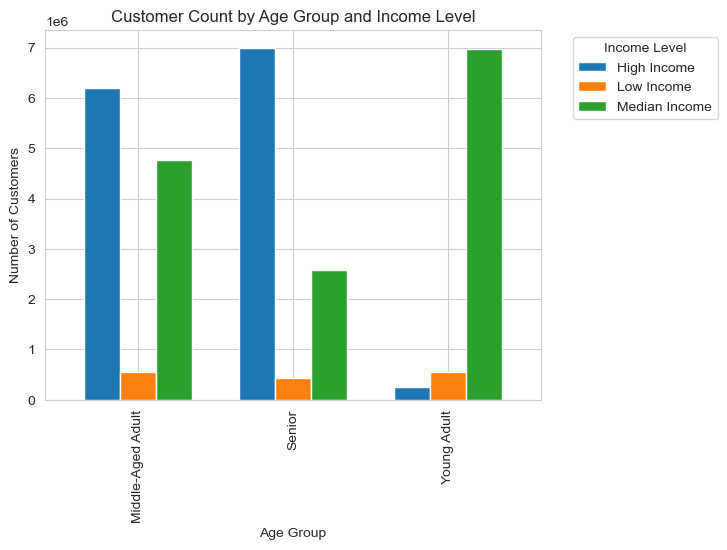

In [25]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
age_income_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Income Level')

# Adjust the legend
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


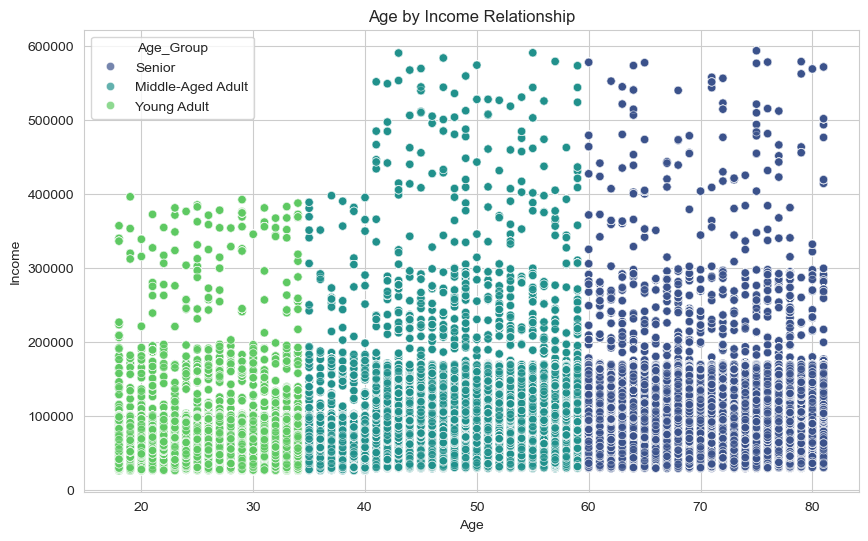

In [26]:
# Set the visual style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=instacart, hue='Age_Group', palette='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age by Income Relationship')

# Show the plot
plt.show()


In [27]:
# Sample mapping dictionary (replace with your actual mapping)
department_mapping = {
    1: 'Produce',
    2: 'Dairy',
    3: 'Beverages',
    # Add all other department mappings here
}

# Map department_id to department_name
instacart['department_name'] = instacart['department_id'].map(department_mapping)


In [28]:
# Categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

instacart['Age_Group'] = instacart['age'].apply(categorize_age)

# Count the number of customers per department
department_counts = instacart['department_name'].value_counts().head(10)
top_departments = department_counts.index.tolist()

# Filter the DataFrame to include only the top 10 departments
filtered = instacart[instacart['department_name'].isin(top_departments)]

# Group by department_name and Age_Group, and count the number of customers
age_department_group = filtered.groupby(['department_name', 'Age_Group']).size().unstack().fillna(0)

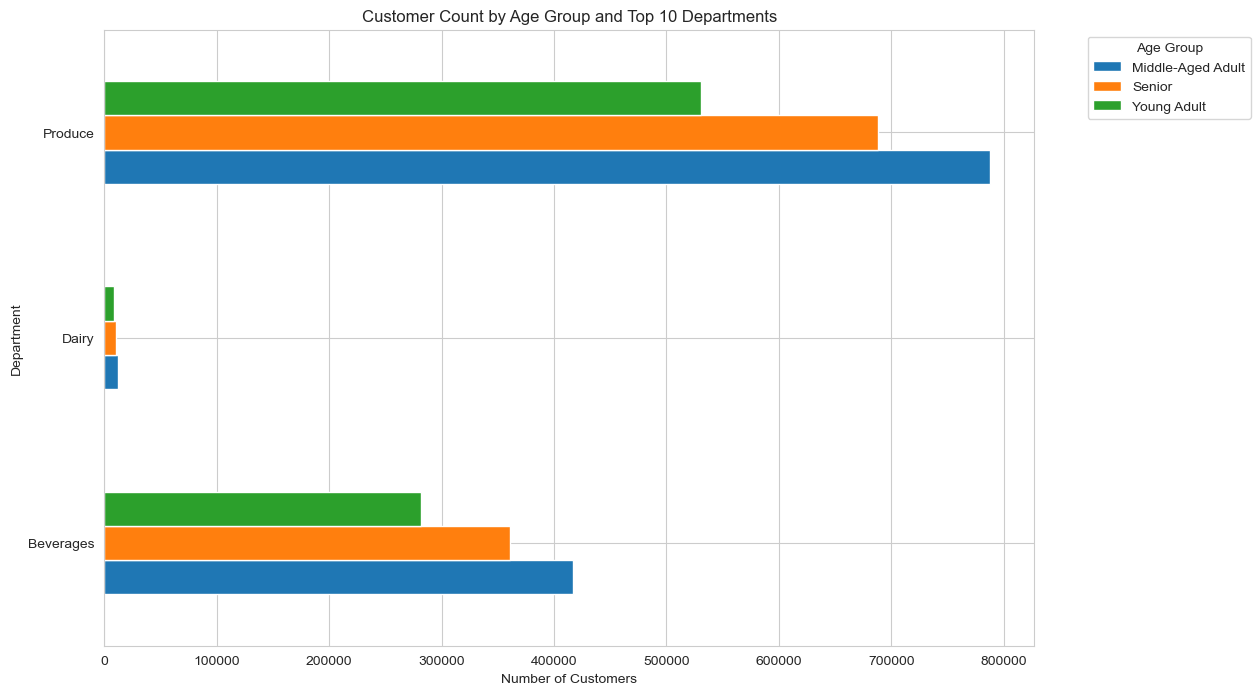

In [29]:
# Create the horizontal bar chart
sns.set_style("whitegrid")
age_department_group.plot(kind='barh', stacked=False, figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Customer Count by Age Group and Top 10 Departments')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
# Define a function to categorize customers by age group
def categorize_age(age):
    if 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Apply the function to create a new column for age group
instacart['Age_Group'] = instacart['age'].apply(categorize_age)


In [31]:
# Group by Age_Group and loyalty_flag, and count the number of customers
age_loyalty_group = instacart.groupby(['Age_Group', 'loyalty_flag']).size().unstack().fillna(0)

print(age_loyalty_group)  # Optional: to check the grouping result


loyalty_flag       Loyal Customer  New Customer  Regular Customer
Age_Group                                                        
Middle-Aged Adult         3833890       1770680           5891298
Senior                    3315535       1561172           5122561
Young Adult               2558249       1211692           4006913


<Figure size 1200x800 with 0 Axes>

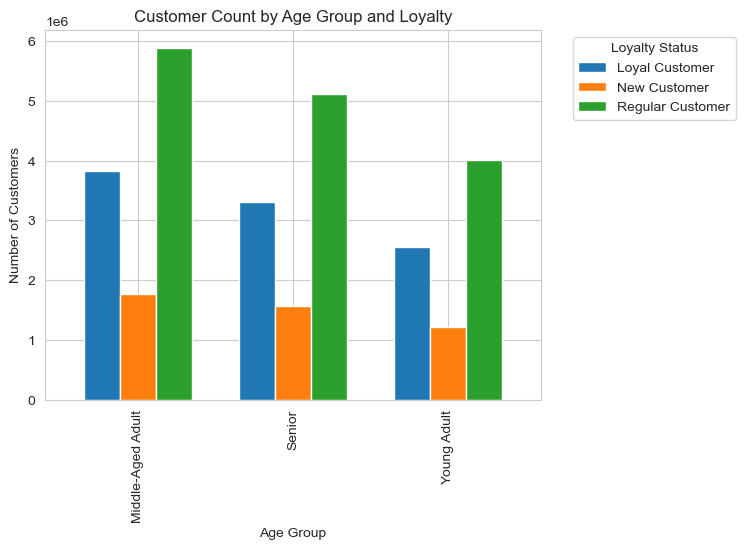

In [32]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
age_loyalty_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Loyalty')

# Adjust the legend
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [33]:
# Define a function to categorize customers by income level
def categorize_income(income):
    if income < 40000:
        return 'Low Income'
    elif 40000 <= income < 100000:
        return 'Median Income'
    else:
        return 'High Income'

# Apply the function to create a new column for income group
instacart['Income_Group'] = instacart['income'].apply(categorize_income)


In [34]:
# Group by department_name and Income_Group, and count the number of customers
income_department_group = instacart.groupby(['department_name', 'Income_Group']).size().unstack().fillna(0)

print(income_department_group)  # Optional: to check the grouping result


Income_Group     High Income  Low Income  Median Income
department_name                                        
Beverages             499491       46460         513875
Dairy                  14773        1829          15673
Produce               933812       96660         975953


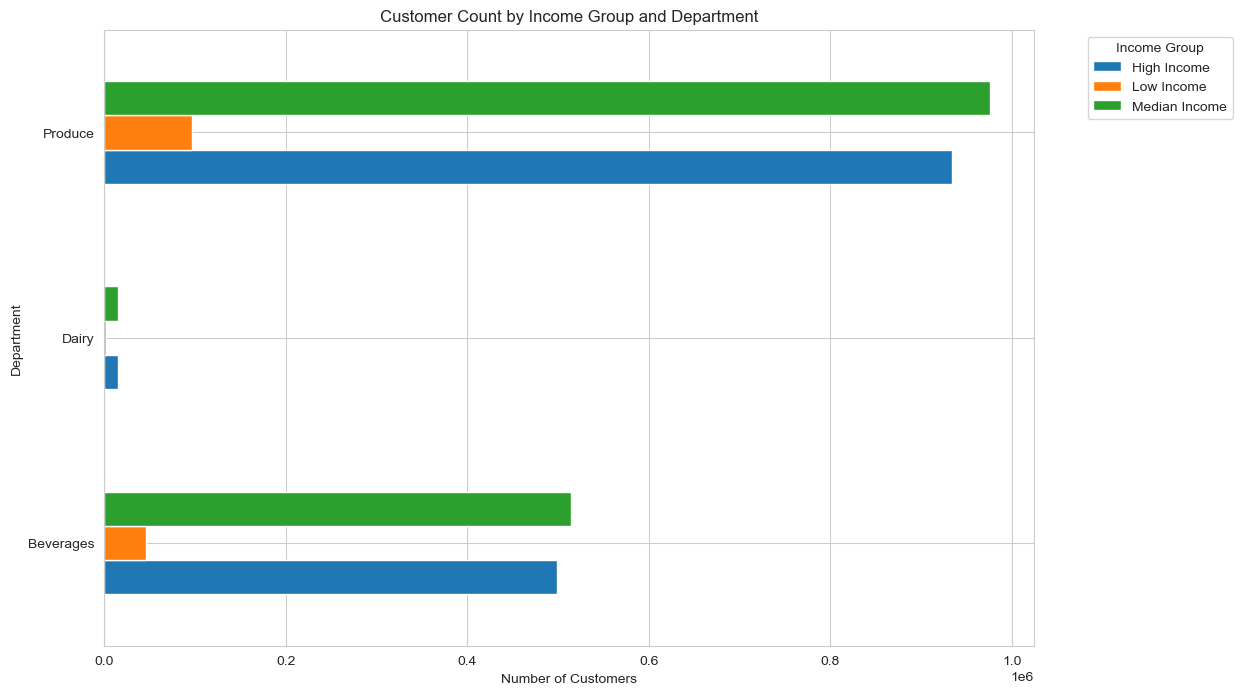

In [35]:
# Set the visual style
sns.set_style("whitegrid")

# Create the horizontal bar chart
income_department_group.plot(kind='barh', stacked=False, figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Customer Count by Income Group and Department')

# Adjust the legend
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [36]:
# Define the base path where you want to save the visualizations
base_path = os.path.join('path_to_save', '04 Analysis', 'Visualizations')

# Ensure the directory exists
os.makedirs(base_path, exist_ok=True)


<Figure size 1200x800 with 0 Axes>

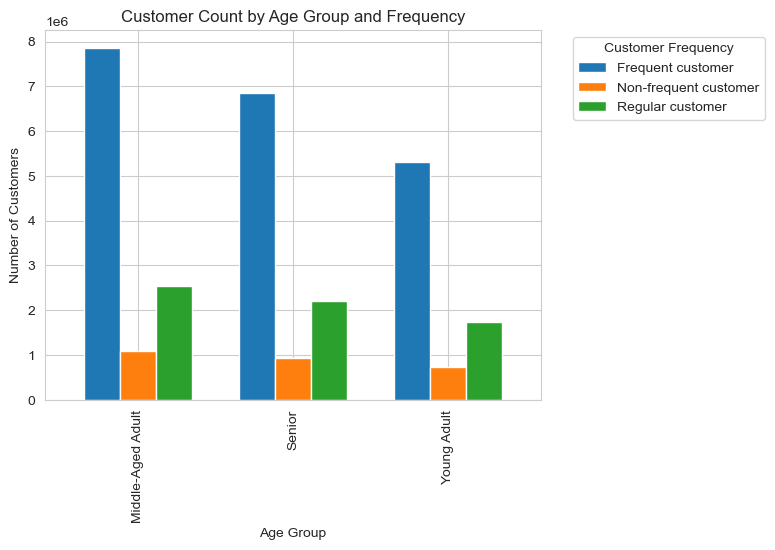

In [37]:
plt.figure(figsize=(12, 10))
age_frequency_group.plot(kind='bar', stacked=False, width=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Frequency')
plt.legend(title='Customer Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_group_by_customer_frequency.png'))
plt.show()


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\2080505476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_order_counts.index, y=marital_order_counts.values, palette="muted")


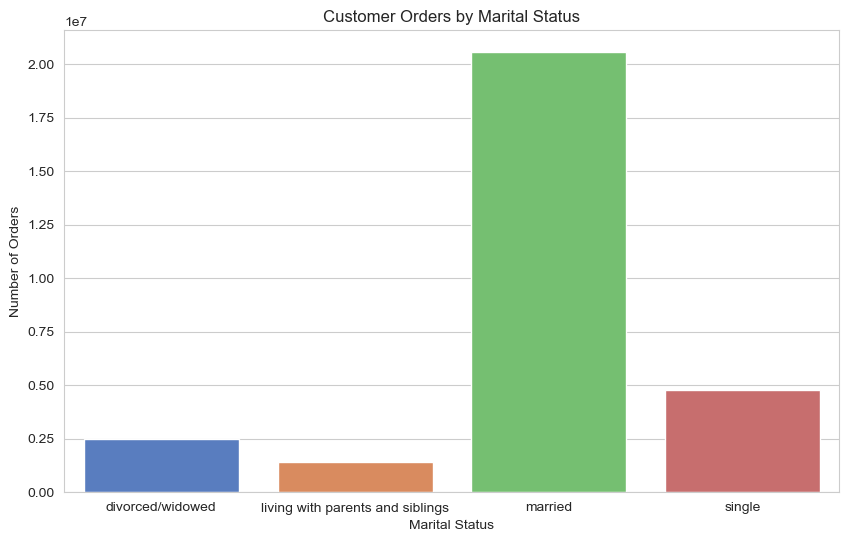

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_order_counts.index, y=marital_order_counts.values, palette="muted")
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.title('Customer Orders by Marital Status')

# Save the plot
plt.savefig(os.path.join(base_path, 'customer_orders_by_marital_comparison.png'))
plt.show()


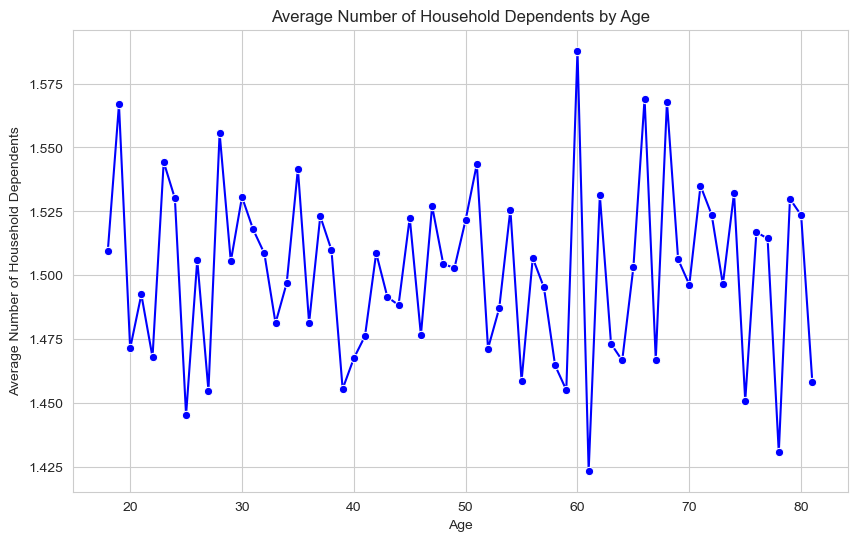

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_dependents.index, y=age_dependents.values, marker='o', color='b')
plt.xlabel('Age')
plt.ylabel('Average Number of Household Dependents')
plt.title('Average Number of Household Dependents by Age')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_by_number_of_dependents.png'))
plt.show()


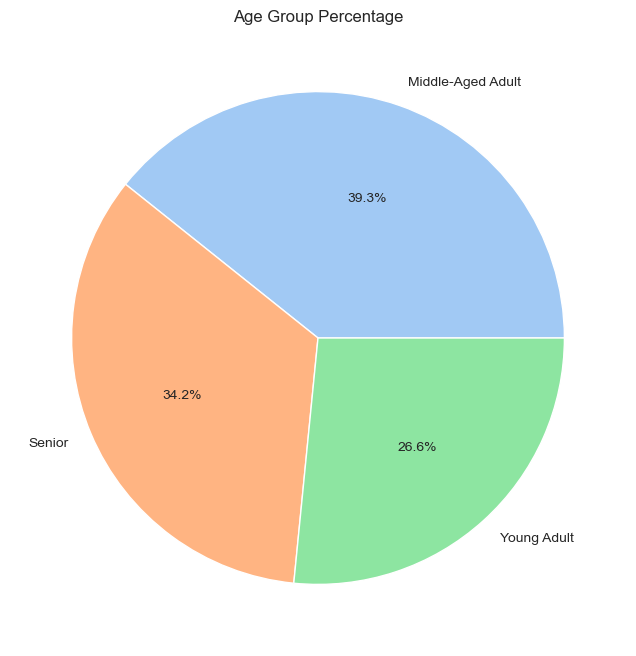

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentage, labels=age_group_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Age Group Percentage')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_group_percentage.png'))
plt.show()


<Figure size 1200x800 with 0 Axes>

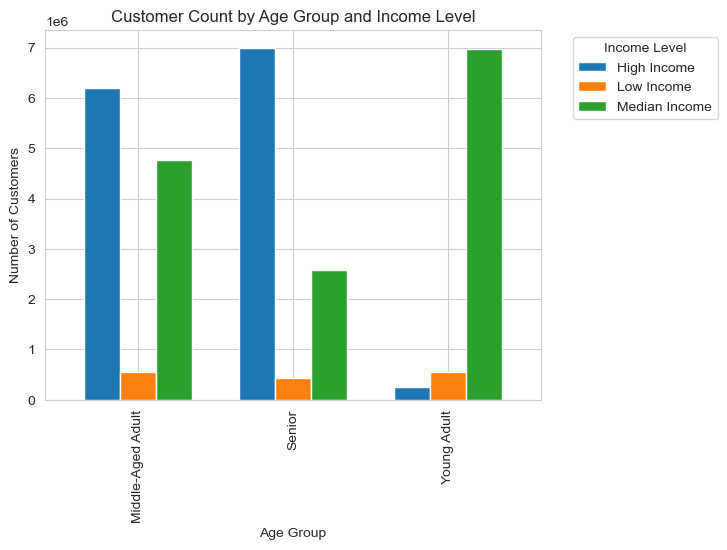

In [41]:
plt.figure(figsize=(12, 10))
age_income_group.plot(kind='bar', stacked=False, width=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Income Level')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_group_by_income.png'))
plt.show()


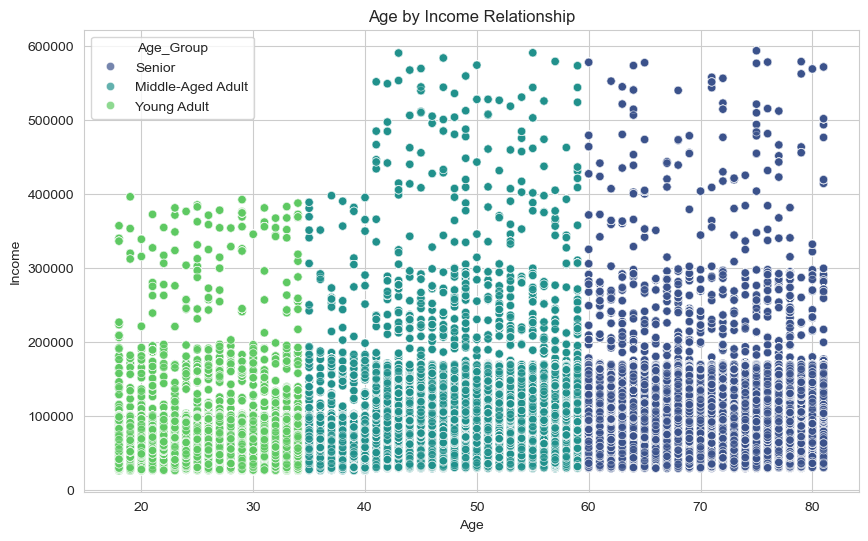

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=instacart, hue='Age_Group', palette='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age by Income Relationship')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_by_income_relationship.png'))
plt.show()


<Figure size 1200x800 with 0 Axes>

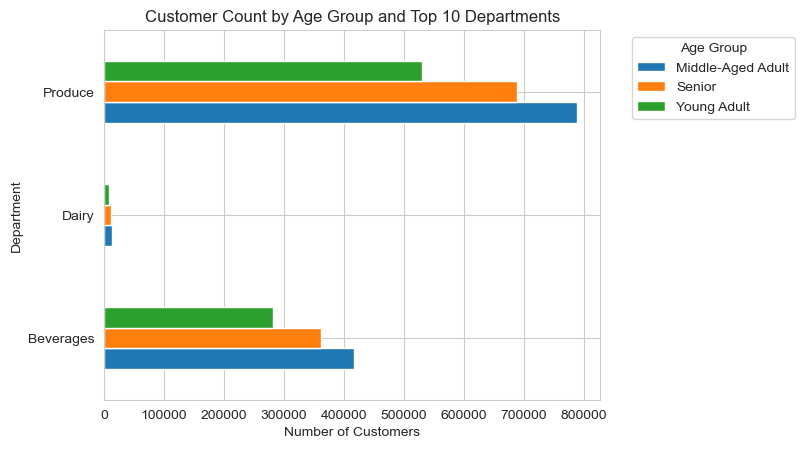

In [43]:
plt.figure(figsize=(12, 10))
age_department_group.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Customer Count by Age Group and Departments')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_group_by_department.png'))
plt.show()


<Figure size 1200x800 with 0 Axes>

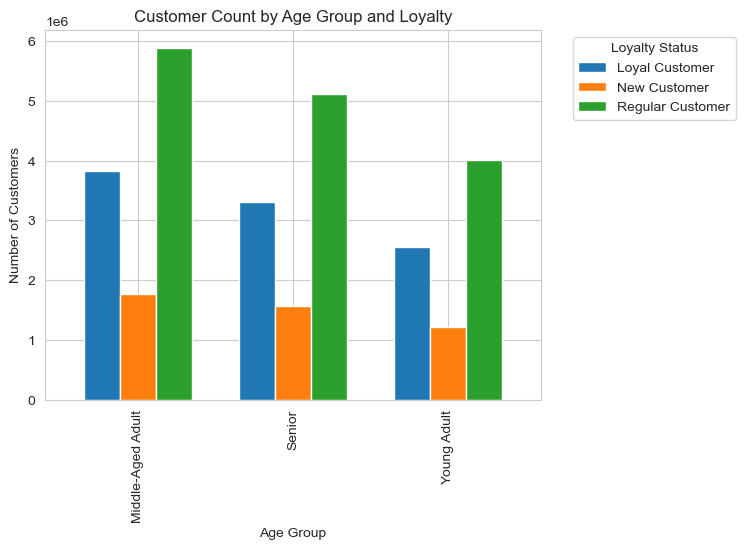

In [44]:
plt.figure(figsize=(12, 10))
age_loyalty_group.plot(kind='bar', stacked=False, width=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Age Group and Loyalty')
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(base_path, 'age_group_by_loyalty.png'))
plt.show()


<Figure size 1200x800 with 0 Axes>

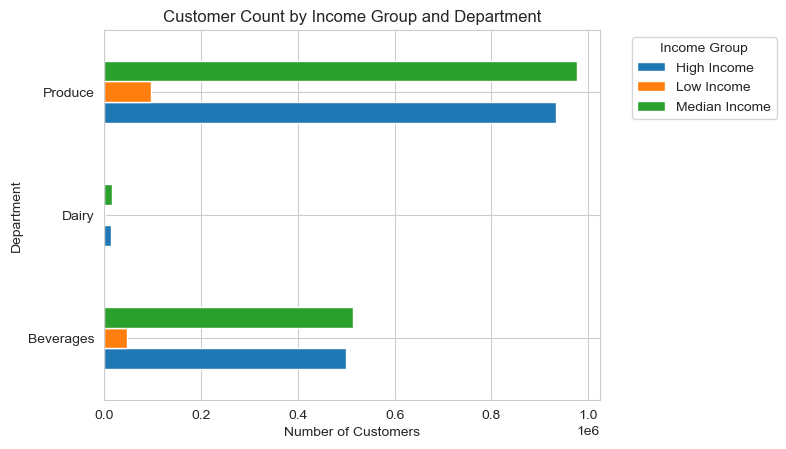

In [45]:
plt.figure(figsize=(12, 10))
income_department_group.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Customer Count by Income Group and Department')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(base_path, 'income_group_by_department.png'))
plt.show()


In [46]:
# Define a function to categorize products by price range
def categorize_price(price):
    if price < 5:
        return 'Low-Range Product'
    elif 5 <= price < 15:
        return 'Middle-Range Product'
    else:
        return 'High-Range Product'

# Apply the function to create a new column for pricing category
instacart['Pricing_Category'] = instacart['prices'].apply(categorize_price)


In [47]:
# Group by Pricing_Category and count the number of orders
pricing_category_counts = instacart['Pricing_Category'].value_counts()

print(pricing_category_counts)  # Optional: to check the grouping result


Pricing_Category
Middle-Range Product    19866539
Low-Range Product        8940434
High-Range Product        465017
Name: count, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\3941827853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pricing_category_counts.index, y=pricing_category_counts.values, palette="muted")


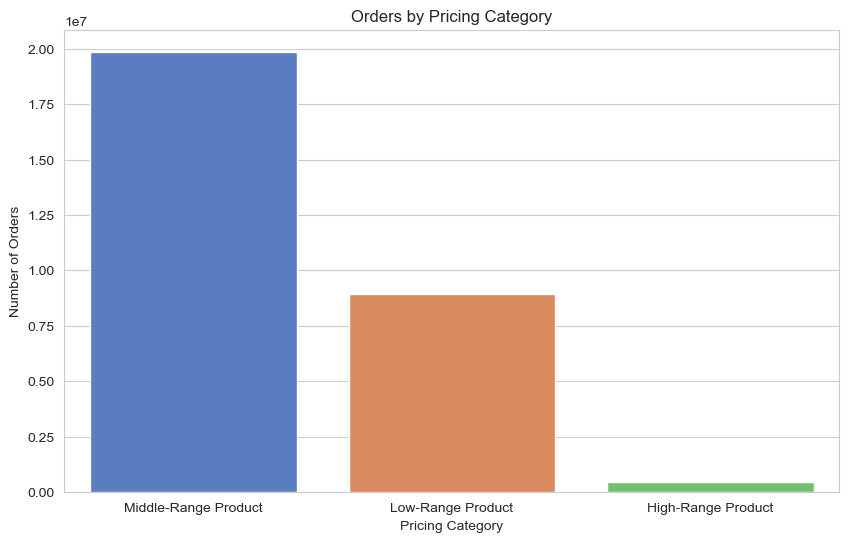

In [48]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=pricing_category_counts.index, y=pricing_category_counts.values, palette="muted")

# Add labels and title
plt.xlabel('Pricing Category')
plt.ylabel('Number of Orders')
plt.title('Orders by Pricing Category')

# Show the plot
plt.show()


In [49]:
# Group by order_hour_of_day and count the number of products sold
hourly_product_sales = instacart['order_hour_of_day'].value_counts().sort_index()

print(hourly_product_sales)  # Optional: to check the grouping result


order_hour_of_day
0      196508
1      103477
2       61677
3       45406
4       47078
5       79868
6      266036
7      815272
8     1568406
9     2235288
10    2504012
11    2471359
12    2358336
13    2402864
14    2429098
15    2400042
16    2283702
17    1874951
18    1463666
19    1128991
20     878621
21     721890
22     573329
23     362113
Name: count, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\935727156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_product_sales.index, y=hourly_product_sales.values, palette="coolwarm")


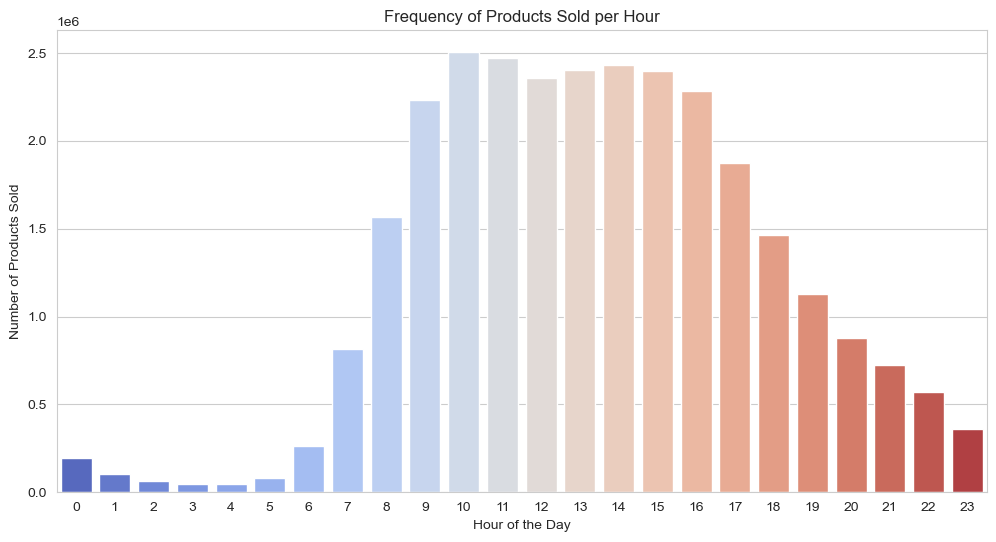

In [50]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_product_sales.index, y=hourly_product_sales.values, palette="coolwarm")

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Sold')
plt.title('Frequency of Products Sold per Hour')

# Show the plot
plt.show()


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\1995960325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pricing_category_counts.index, y=pricing_category_counts.values, palette="muted")


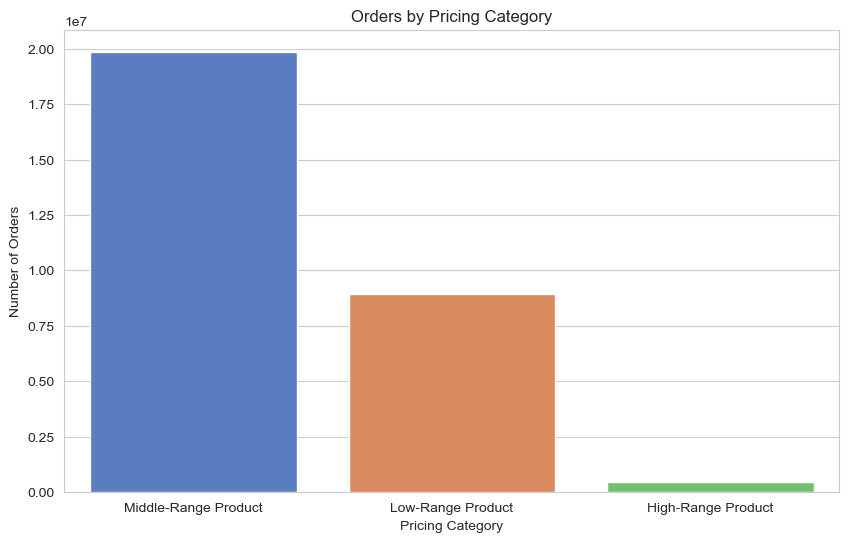

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pricing_category_counts.index, y=pricing_category_counts.values, palette="muted")
plt.xlabel('Pricing Category')
plt.ylabel('Number of Orders')
plt.title('Orders by Pricing Category')

# Save the plot
plt.savefig(os.path.join(base_path, 'orders_by_pricing_category.png'))
plt.show()


C:\Users\smerg\AppData\Local\Temp\ipykernel_12420\3065653440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_product_sales.index, y=hourly_product_sales.values, palette="coolwarm")


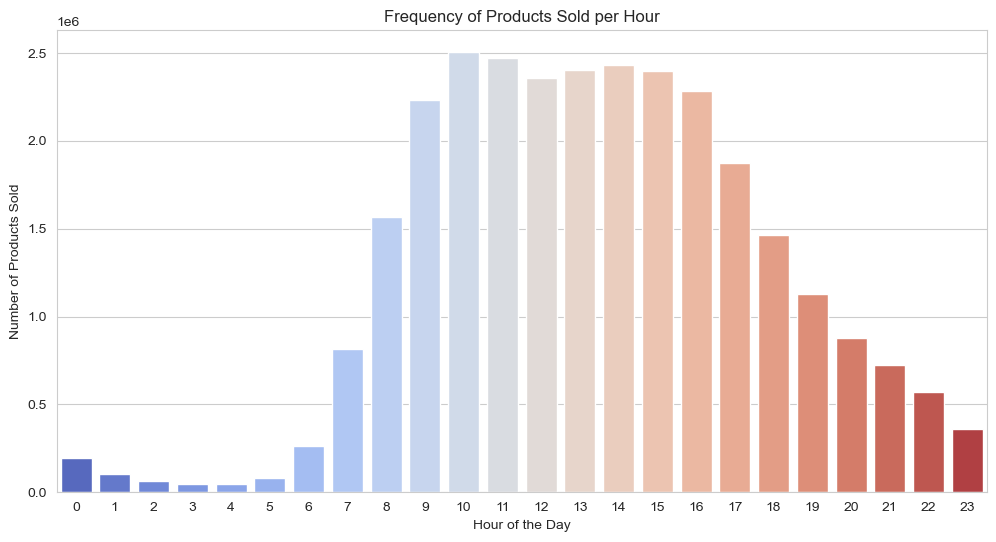

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_product_sales.index, y=hourly_product_sales.values, palette="coolwarm")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Sold')
plt.title('Frequency of Products Sold per Hour')

# Save the plot
plt.savefig(os.path.join(base_path, 'frequency_of_products_sold_per_hour.png'))
plt.show()
